# How does cooking change the antioxidant activity of different vegetables? 

This question was answered in a paper(1) that measured the antioxidant activity of 20 different vegetables with 6 cooking methods. The authors used three different assays to measure antioxidant activity. In the paper, the results are only available in tabular format. Here, I'm visualizing the results for a faster grasp of the results. 

(1) A M Jiménez-Monreal, L García-Diz, M Martínez-Tomé, M Mariscal, M A Murcia. Influence of Cooking Methods on Antioxidant Activity of Vegetables. J Food Sci, 2009. https://doi.org/10.1111/j.1750-3841.2009.01091.x


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# extracted the table data from the PDF with Tabula 
# https://tabula.technology/

# read the data with pandas
dfLOO = pd.read_csv('cooking_veg_LOO.csv')
dfOH = pd.read_csv('cooking_veg_OH.csv')
dfABTS = pd.read_csv('cooking_veg_ABTS.csv')

In [3]:
# correct column naming errors in the table conversion
dfABTS.rename(columns = {'Boiling Pressure-cooking': 'Boiling', 'Unnamed: 2': 'Pressure-cooking'}, inplace  = True)

In [4]:
# define functions for data cleaning 

def extract_mean(data):
    """ 
    Extract all numbers and signs preceeding the ± sign. 
    Input: a string, one entry in the data frame. 
    Returns: mean value as a float, 0 if not significant result. 
    """
    try:
        output = float(data.split()[0])
    except ValueError:
        try:
            output = float(data.split()[0][1:])
            output = -output 
        except ValueError:
            output = 0
            
    output = -output
    return output

In [5]:
methods = dfLOO.columns[1:] # names of all cooking methods
tables = [dfLOO, dfOH, dfABTS] # list of the three tables

In [6]:
# Cleaning the data: 
## extract the mean values from the text in each table
## replacing the non-significant values with 0 loss 
## and changing the sign of the losses, such that a positive number means antioxidant activity gain, and a negative number means loss
for table in tables:
    for method in methods:
        table[method] = table[method].apply(extract_mean)
    table.set_index('Vegetables', inplace = True) #change the index to the vegetable names

In [7]:
# resulting cleaned data frame with mean values
dfLOO

,Boiling,Pressure-cooking,Baking,Microwaving,Griddling,Frying
Vegetables,,,,,,
Artichoke,0.0,0.0,0.0,0.0,0.0,0.0
Asparagus,6.7,0.0,0.0,0.0,7.0,-6.5
Beetroot,-5.0,0.0,-19.6,-22.0,0.0,-21.4
Broad bean,-9.7,-6.8,-10.5,-10.4,-8.0,-11.8
Broccoli,-32.7,-37.4,0.0,-34.2,6.5,-15.6
Brussels sprout,-33.0,-38.9,-31.8,-40.3,-35.1,-42.4
Cauliflower,-55.0,-36.7,-36.4,-56.7,-11.8,-23.9
Carrot,-33.9,-43.7,-31.7,-42.2,-13.7,-11.1
Celery,-21.2,-34.3,-11.2,-30.7,0.0,-18.9


In [8]:
# concatenate all data frames and calculate the mean over the 3 antioxidant-activity assays
df = pd.concat([dfLOO, dfOH, dfABTS])
dfmean = df.groupby(df.index).mean()

In [9]:
titles = ['LOO radicals assay', 'OH radicals assay', 'ABTS radicals assay', 'Mean']

In [10]:
tables.append(dfmean) #add the means dataframe to the list of tables 

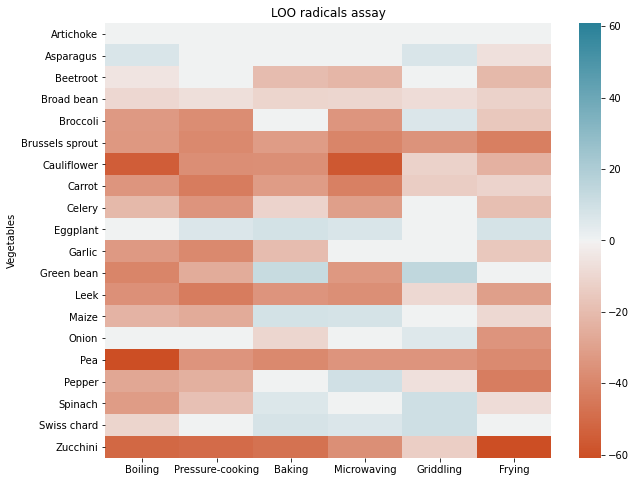

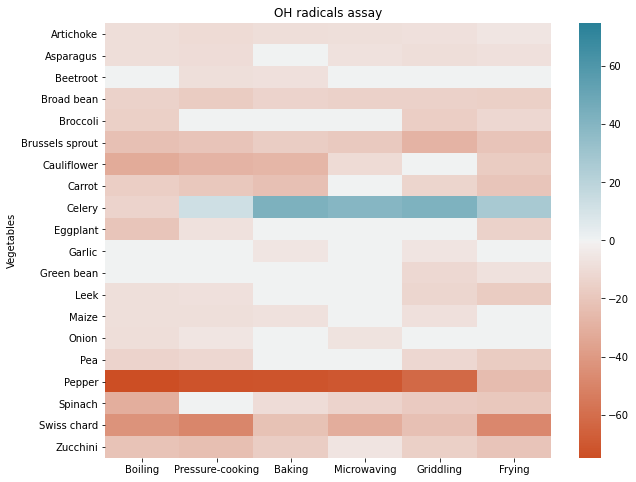

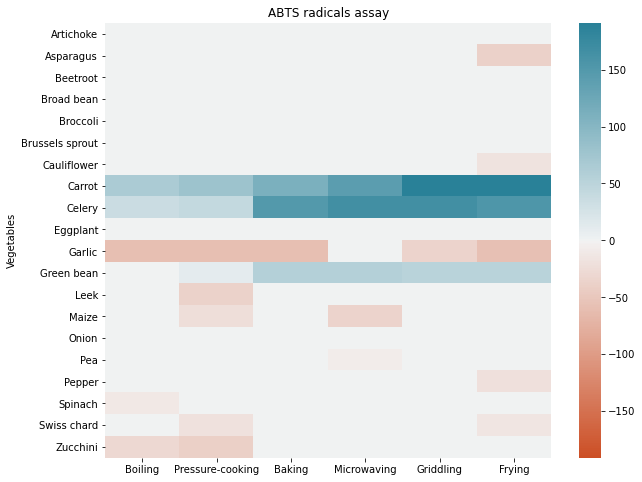

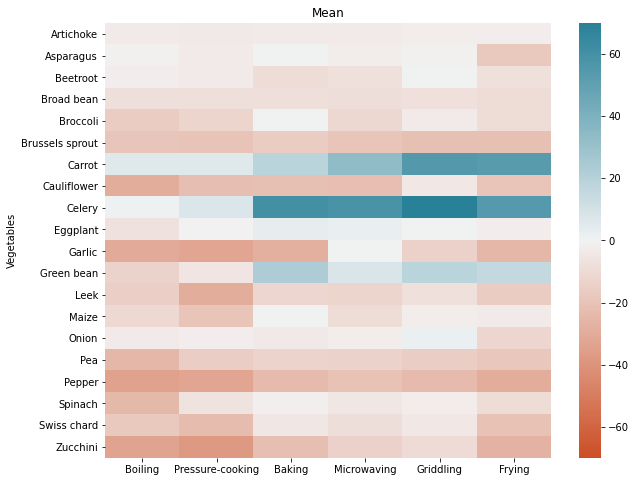

In [11]:
# visualize the antioxidant loss for the three assays and the mean 
c = -1
for table in tables:
    c +=1
    maxval = max([abs(max(table.max())), abs(min(table.min()))])
    plt.figure(figsize = (10,8))
    plt.title(titles[c])
    sns.heatmap(table, cmap = sns.diverging_palette(20, 220, s= 89, as_cmap=True), vmin = -maxval, vmax = maxval)

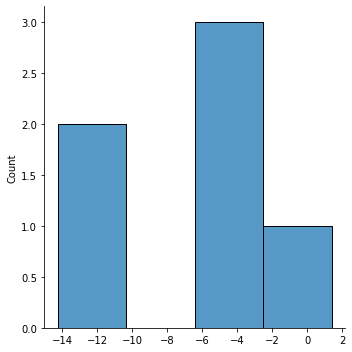

In [14]:
sns.displot(df.mean(axis = 0))